<a href="https://colab.research.google.com/github/MohammadHelaly/Facial-Recognition/blob/main/Facial_Recognition_6750_6870_6952.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACIAL** **RECOGNITION**

# **Import needed packages and libraries.**

In [1]:
import sys
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import cv2


# **Generate  data matrix D and label vector y.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path='/content/drive/MyDrive/archive'
D = []
y = []

subjects=os.listdir(path)
subjects.sort(key=lambda x: int(x[x.find("s")+1:]))

for subject in subjects:

    s_path = os.path.join(path, subject)
    images = os.listdir(s_path)
    images.sort(key=lambda x: int(x[:x.find(".")]))

    for image in images:

        im_path = os.path.join(s_path, image)
        im_temp = Image.open(im_path)
        im_temp = np.asarray(im_temp)
        im_temp = im_temp.flatten()
        D.append(im_temp)
        y.append(int(subject[1:]))

D=np.asarray(D)
y=np.asarray(y)

# **Split dataset into equal training and test sets.**

In [4]:
D_train = []
D_test = []
y_train = []
y_test = []

for i in range (0, len(D)):

    if i % 2 != 0:
        
        D_train.append(D[i])
        y_train.append(y[i])

    elif i % 2 == 0:

        D_test.append(D[i])
        y_test.append(y[i])

D_test=np.asarray(D_test)
D_train=np.asarray(D_train)
y_test=np.asarray(y_test)
y_train=np.asarray(y_train)

print(D_train.shape)


(200, 10304)


# **Split dataset into 7 training instances and 3 test instances per subject.**

In [5]:
D_train7 = []
D_test3 = []
y_train7 = []
y_test3 = []

for i in set(y):
     C = D[y==i,:]
     for j in range (0,7):
          D_train7.append(C[j])
     for j in range (7,len(C)):
          D_test3.append(C[j])

for i in range (0, len(y),10):
     for j in range (0,7):
          y_train7.append(y[i+j])
     for j in range (7,len(C)):
          y_test3.append(y[i+j])

D_test3=np.asarray(D_test3)
D_train7=np.asarray(D_train7)
y_test3=np.asarray(y_test3)
y_train7=np.asarray(y_train7)

# **Non-Face images**

In [6]:
path='/content/drive/MyDrive/archive_3'
Dn = []
yn = []

images = os.listdir(path)
images.sort(key=lambda x: int(x[x.find("(")+1:x.find(")")]))

for image in images:
  imn_path = os.path.join(path, image)
  imn_temp = Image.open(imn_path)
  imn_temp = imn_temp.convert("L") 
  imn_temp = np.asarray(imn_temp)
  imn_temp = imn_temp.flatten()
  Dn.append(imn_temp)
  yn.append(0)

Dn=np.asarray(Dn)
yn=np.asarray(yn)
print(Dn.shape)

(400, 10304)


# **KNN: K-th Nearest Neighbour.**(Classifier Tunning)
In KNN classifier we used built in function from sklearn library which helps us to fit the data to the suitable shape to make a predicted data and test the accuracy.


In [7]:
def KNN_simple_classifier (D_train, y_train, D_test, y_test):
    classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski' , p=2)
    classifier.fit(D_train, y_train)
    predicted = classifier.predict(D_test)
    k =1 
    accuracy = metrics.accuracy_score(y_test, predicted)
    print(f'k={1}: accuracy={metrics.accuracy_score(y_test, predicted)} ') 

def KNN_classifier_tuning (D_train, y_train, D_test, y_test):
    k = [1,3,5,7]
    ac = []
    for i in k:
        classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski' , p=2)
        trained = classifier.fit(D_train, y_train)
        predicted = classifier.predict(D_test)
        accuracy = metrics.accuracy_score(y_test, predicted)
        print(f'k={i}: accuracy={metrics.accuracy_score(y_test, predicted )} ')
        ac.append(accuracy)
    plt.plot(k,ac)
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.grid()
    plt.show() 

def KNN_simple_classifier_acc (D_train, y_train, D_test, y_test,acn):
    classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski' , p=2)
    classifier.fit(D_train, y_train)
    predicted = classifier.predict(D_test)
    k =1 
    accuracy = metrics.accuracy_score(y_test, predicted)
    acn.append(accuracy)    

def KNN_fail_success (D_train, y_train, D_test, y_test,D):
    classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski' , p=2)
    classifier.fit(D_train, y_train)
    predicted = classifier.predict(D_test)
    k =1  
    success = []
    failure = []
    for i in range (0,len(predicted)):
        if y_test[i] == predicted[i]:
            success.append(D[i])
        elif y_test[i] != predicted[i]:
            failure.append(D[i])   
    success = np.asarray(success)
    failure = np.asarray(failure)
    print("Some success cases:")
    for i in range (0,15,5):
        plt.imshow(np.reshape(success[i], (112, 92)), cmap='gray')
        plt.axis('off')
        plt.show()
    print("Some failure cases:")
    for i in range (0,6,2):
        plt.imshow(np.reshape(failure[i], (112, 92)), cmap='gray')
        plt.axis('off')
        plt.show()    

# **PCA: Principal Component Analysis.**

- calculate sample mean and centre data.
- calculate covariance matrix.
- calculate eigenvectors and eigenvalues.
- choose dominant eigenvectors based on dimensionality to obtain projection matrix U.

In [8]:
def PCA (D,y):
    Z =np.zeros(D.shape)

    mean = np.mean(D, axis = 0)
    mean = np.asarray(mean).reshape(len(D[0]),1)
    
    for i in range(0,len(D)):
        Z[i] = D[i] - mean.T
    Z = np.asarray(Z)
    COV = np.cov(Z.T)
    return COV


# **LDA: Linear Discriminant Analysis.**

- calculate sample mean and mean vector for each class.
- calculate Sb and S matrices.
- calculate S^-1 and (S^-1*Sb) then calculte eigenvectors and eigenvalues.
- choose 39 dominant eigenvectors to obtain projection matrix U.

In [9]:
def LDA (D,y):
   
    Mu = []
    for i in set(y):
        Temp = D[y==i,:]
        mu = np.mean(Temp, axis = 0)
        Mu.append(mu)
    Mus = []
    mus = np.mean(D, axis = 0)
    Mus.append(mus)
    Mus = np.asarray(Mus)
    Mus = np.transpose(Mus) 
   
    Mu = np.asarray(Mu)
    Mu = np.transpose(Mu)
  
    MuT = np.transpose(Mu) 
    Sb = np.zeros((len(Mu),len(Mu)))
    S = np.zeros((len(Mu),len(Mu)))

    for k in set(y):

        Mu_minus = np.transpose(Mu[:,k-1]) - np.transpose(Mus[:,0]).reshape(len(Mu),1)
        Mu_minus_temp = np.matmul(Mu_minus,np.transpose(Mu_minus))
        Sb += (np.count_nonzero(y == k)*Mu_minus_temp)
        Temp2 = D[y==k,:]
        Z = Temp2 - MuT[k-1]
        ZT = np.transpose(Z)
        Si = np.matmul(ZT,Z)
        S += Si

    Sinv = np.linalg.inv(S)
    A = np.matmul(Sinv,Sb)
    eigvals, eigvecs = np.linalg.eigh(A)
    Temp3 = np.fliplr(eigvecs)
    U = Temp3[:,:39]

    return U

# **kernel PCA**

**Kernel PCA**: Kernel PCA is yet another extension of PCA using a kernel. The kernel is a mathematical technique using which we can map instances to very high dimensional space called the feature space, enabling non-linear classification. This is usually employed in novelty detections and image de-noising. Scikit-Learn provides a class KernelPCA in sklearn.decomposition which can be used to perform Kernel PCA.

**The accuracy**: we have noticed that when k = 1 The accuracy is much better than the original PCA and it decreases if we increase the value of k which makes sense because the Kernel PCA built in function is already classify the data specially non linear data much better and remove the  less useful dimensions so the precision error is low.


k=1: accuracy=1.0 
k=3: accuracy=0.435 
k=5: accuracy=0.335 
k=7: accuracy=0.28 


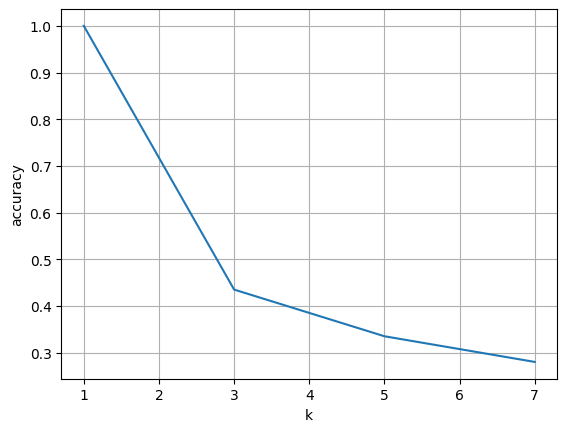

In [33]:

kernel_pca=KernelPCA(n_components=50,kernel='rbf')
Kpca_train= kernel_pca.fit_transform(D_train)
Kpca_test= kernel_pca.fit_transform(D_test)

KNN_classifier_tuning (Kpca_train, y_train, Kpca_test, y_test)

# **Quadratic LDA**

Quadratic discriminant analysis is a method you can use when you have a set of predictor variables and you’d like to classify a response variable into two or more classes.

It is considered to be the non-linear equivalent to linear discriminant analysis.

In [24]:
from sklearn.metrics import accuracy_score
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(D_train, y_train.ravel())
D_test_qda = qda.predict(D_test)
#print(D_test_qda)
acc= accuracy_score(y_test,D_test_qda)
print("accuracy of the QDA on the faces dataset = ",acc)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy of the QDA on the faces dataset =  0.04


In [26]:
U = LDA(D,y)

Project equal training and test sets using U. 

In [27]:
D_train_P =np.matmul(D_train,U)
D_test_P =np.matmul(D_test,U)

KNN with simple classifier on LDA (equal sets).

In [28]:

KNN_simple_classifier (D_train_P, y_train, D_test_P, y_test)

k=1: accuracy=0.955 


KNN classifier tuning on LDA (equal sets).

k=1: accuracy=0.955 
k=3: accuracy=0.87 
k=5: accuracy=0.82 
k=7: accuracy=0.775 


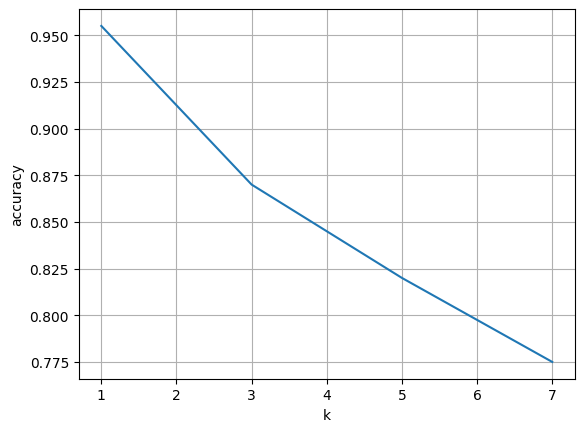

In [29]:
KNN_classifier_tuning (D_train_P, y_train, D_test_P, y_test)

We got maximum accuracy at k=1 and it was between 95.5%-77.5% in all LDA cases and we noticed that when the value of K increases, the accuracy decreases.

Project unequal training and test sets using U.

In [30]:
D_train7_P =np.matmul(D_train7,U)
D_test3_P =np.matmul(D_test3,U)

KNN with simple classifier on LDA (unequal sets).

In [32]:
KNN_simple_classifier (D_train7_P, y_train7, D_test3_P, y_test3)

k=1: accuracy=0.9333333333333333 


KNN classifier tuning on LDA (unequal sets).

k=1: accuracy=0.9333333333333333 
k=3: accuracy=0.925 
k=5: accuracy=0.8583333333333333 
k=7: accuracy=0.7916666666666666 


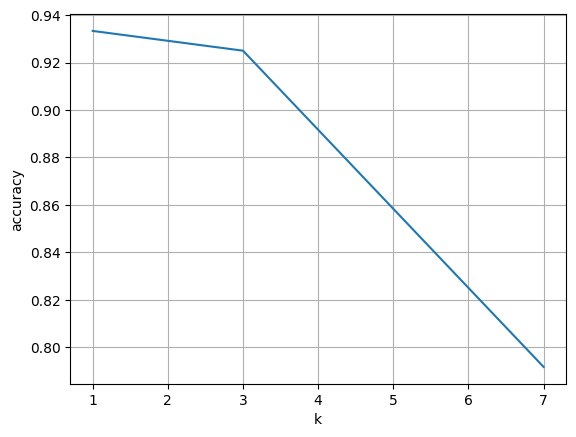

In [34]:
KNN_classifier_tuning (D_train7_P, y_train7, D_test3_P, y_test3)

We have noticed that when we change the splitting size and increase the training set size, the accuracy also increases.

Perform PCA on data to obtain projection matrices.

In [35]:
COV = PCA(D_train,y)
eigvals , eigvecs = np.linalg.eigh(COV)
eigvals = np.flip(eigvals)
eigvecs = np.fliplr(eigvecs)
s = np.sum(eigvals)
r = []
alpha = [0.8,0.85,0.9,0.95]
for i in range(0,4):
    fr = 0
    for j in range(0,10304):
        fr += eigvals[j] / s
        if fr >= alpha[i]:
            r.append(j)
            break
print(r)
U1 = eigvecs[:,:r[0]]
U2 = eigvecs[:,:r[1]]
U3 = eigvecs[:,:r[2]]
U4 = eigvecs[:,:r[3]]

[36, 52, 76, 115]


Projecting equal training and tests sets using U.

In [36]:
D_train_P1 = np.dot(D_train,U1)
D_test_P1 = np.dot(D_test,U1)

D_train_P2 = np.dot(D_train,U2)
D_test_P2 = np.dot(D_test,U2)

D_train_P3 = np.dot(D_train,U3)
D_test_P3 = np.dot(D_test,U3)

D_train_P4 = np.dot(D_train,U4)
D_test_P4 = np.dot(D_test,U4)

KNN with simple classifier on PCA (equal sets).

In [37]:
print("For alpha = ",alpha[0])
KNN_simple_classifier (D_train_P1, y_train, D_test_P1, y_test)
print("For alpha = ",alpha[1])
KNN_simple_classifier (D_train_P2, y_train, D_test_P2, y_test)
print("For alpha = ",alpha[2])
KNN_simple_classifier (D_train_P3, y_train, D_test_P3, y_test)
print("For alpha = ",alpha[3])
KNN_simple_classifier (D_train_P4, y_train, D_test_P4, y_test)


For alpha =  0.8
k=1: accuracy=0.93 
For alpha =  0.85
k=1: accuracy=0.94 
For alpha =  0.9
k=1: accuracy=0.945 
For alpha =  0.95
k=1: accuracy=0.935 


KNN classifier tuning on PCA (equal sets).

For alpha =  0.8
k=1: accuracy=0.93 
k=3: accuracy=0.855 
k=5: accuracy=0.81 
k=7: accuracy=0.775 


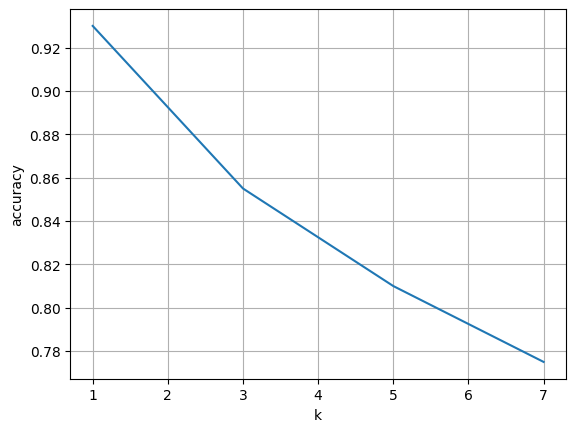

For alpha =  0.85
k=1: accuracy=0.94 
k=3: accuracy=0.86 
k=5: accuracy=0.83 
k=7: accuracy=0.77 


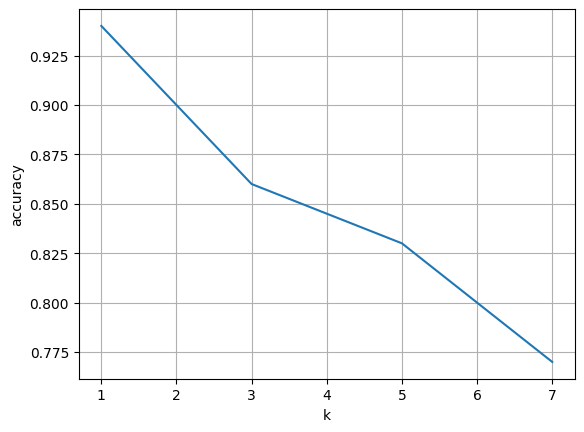

For alpha =  0.9
k=1: accuracy=0.945 
k=3: accuracy=0.85 
k=5: accuracy=0.81 
k=7: accuracy=0.76 


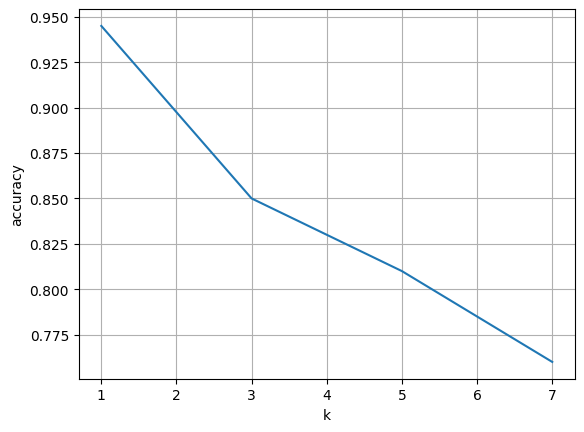

For alpha =  0.95
k=1: accuracy=0.935 
k=3: accuracy=0.845 
k=5: accuracy=0.815 
k=7: accuracy=0.74 


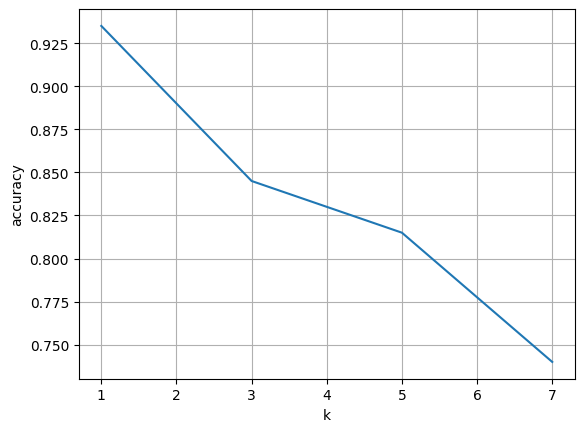

In [38]:
print("For alpha = ",alpha[0])
KNN_classifier_tuning (D_train_P1, y_train, D_test_P1, y_test)
print("For alpha = ",alpha[1])
KNN_classifier_tuning (D_train_P2, y_train, D_test_P2, y_test)
print("For alpha = ",alpha[2])
KNN_classifier_tuning (D_train_P3, y_train, D_test_P3, y_test)
print("For alpha = ",alpha[3])
KNN_classifier_tuning (D_train_P4, y_train, D_test_P4, y_test)

We got maximum accuracy at k=1 and it was between 95%-75% in all PCA cases and we noticed that when the value of alpha increases, the accuracy decreases.

Projecting unequal training and tests sets using U.

In [39]:
D_train7_P1 = np.dot(D_train7,U1)
D_test3_P1 = np.dot(D_test3,U1)

D_train7_P2 = np.dot(D_train7,U2)
D_test3_P2 = np.dot(D_test3,U2)

D_train7_P3 = np.dot(D_train7,U3)
D_test3_P3 = np.dot(D_test3,U3)

D_train7_P4 = np.dot(D_train7,U4)
D_test3_P4 = np.dot(D_test3,U4)


KNN with simple classifier on PCA (unequal sets).

In [40]:
print("For alpha = ",alpha[0])
KNN_simple_classifier (D_train7_P1, y_train7, D_test3_P1, y_test3)
print("For alpha = ",alpha[1])
KNN_simple_classifier (D_train7_P2, y_train7, D_test3_P2, y_test3)
print("For alpha = ",alpha[2])
KNN_simple_classifier (D_train7_P3, y_train7, D_test3_P3, y_test3)
print("For alpha = ",alpha[3])
KNN_simple_classifier (D_train7_P4, y_train7, D_test3_P4, y_test3)

For alpha =  0.8
k=1: accuracy=0.9583333333333334 
For alpha =  0.85
k=1: accuracy=0.9583333333333334 
For alpha =  0.9
k=1: accuracy=0.9666666666666667 
For alpha =  0.95
k=1: accuracy=0.9583333333333334 


KNN classifier tuning on PCA (unequal sets).

For alpha =  0.8
k=1: accuracy=0.9583333333333334 
k=3: accuracy=0.95 
k=5: accuracy=0.9 
k=7: accuracy=0.8666666666666667 


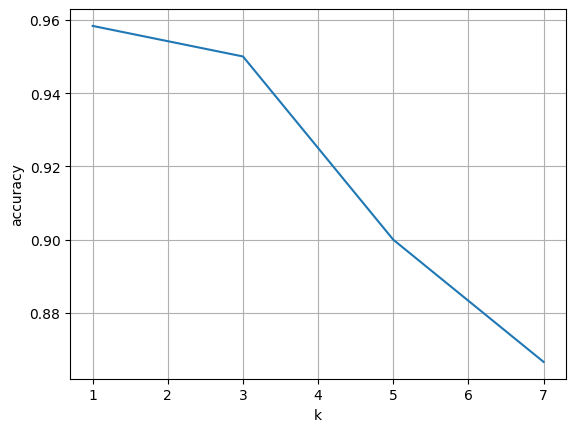

For alpha =  0.85
k=1: accuracy=0.9583333333333334 
k=3: accuracy=0.95 
k=5: accuracy=0.9 
k=7: accuracy=0.8583333333333333 


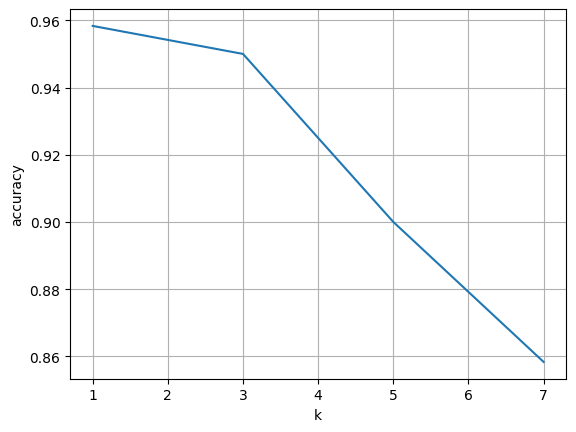

For alpha =  0.9
k=1: accuracy=0.9666666666666667 
k=3: accuracy=0.95 
k=5: accuracy=0.9 
k=7: accuracy=0.8666666666666667 


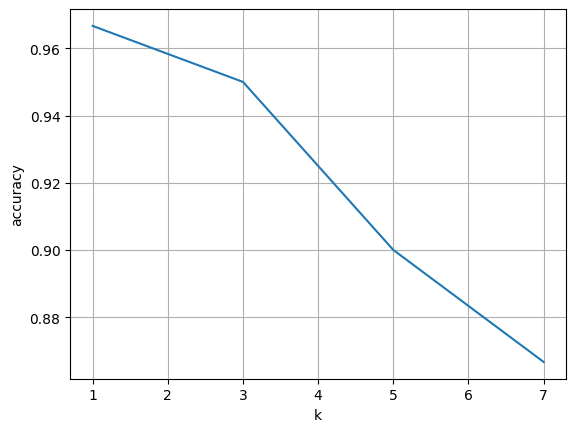

For alpha =  0.95
k=1: accuracy=0.9583333333333334 
k=3: accuracy=0.9583333333333334 
k=5: accuracy=0.8916666666666667 
k=7: accuracy=0.875 


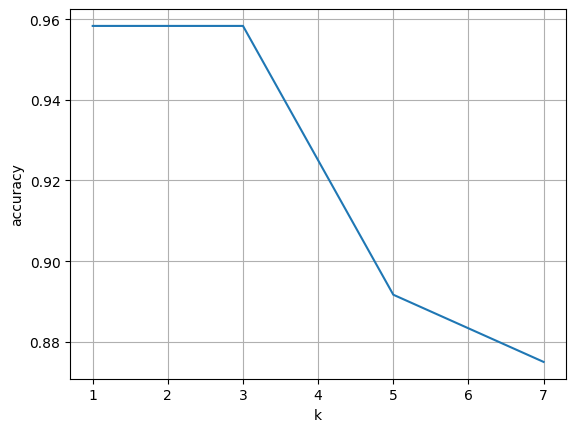

In [41]:
print("For alpha = ",alpha[0])
KNN_classifier_tuning (D_train7_P1, y_train7, D_test3_P1, y_test3)
print("For alpha = ",alpha[1])
KNN_classifier_tuning (D_train7_P2, y_train7, D_test3_P2, y_test3)
print("For alpha = ",alpha[2])
KNN_classifier_tuning (D_train7_P3, y_train7, D_test3_P3, y_test3)
print("For alpha = ",alpha[3])
KNN_classifier_tuning (D_train7_P4, y_train7, D_test3_P4, y_test3)

# **Append non-face images to face images.**

In [10]:
ynn = np.ones(y.shape)

Dn1 = D
Dn1 = np.concatenate((Dn1 , Dn[0:100,:] ), axis=0)
yn1 = np.concatenate((ynn , yn[0:100] ), axis=0)

Dn2 = D
Dn2 = np.concatenate((Dn2 , Dn[0:200,:] ), axis=0)
yn2 = np.concatenate((ynn , yn[0:200] ), axis=0)

Dn3 = D
Dn3 = np.concatenate((Dn3 , Dn[0:300,:] ), axis=0)
yn3 = np.concatenate((ynn , yn[0:300] ), axis=0)

Dn4 = D
Dn4 = np.concatenate((Dn4 , Dn[0:400,:] ), axis=0)
yn4 = np.concatenate((ynn , yn[0:400] ), axis=0)


# **Split the non-face images dataset into train and test sets**

In [15]:
Dn1_train = []
Dn1_test = []
yn1_train = []
yn1_test = []

for i in range (0, len(Dn1)):

    if i % 2 != 0:
        
        Dn1_train.append(Dn1[i])
        yn1_train.append(yn1[i])

    elif i % 2 == 0:

        Dn1_test.append(Dn1[i])
        yn1_test.append(yn1[i])

Dn1_test=np.asarray(Dn1_test)
Dn1_train=np.asarray(Dn1_train)
yn1_test=np.asarray(yn1_test)
yn1_train=np.asarray(yn1_train)


# **PCA on face vs non face.**

In [44]:
COV = PCA(Dn1_train,yn1)
eigvals , eigvecs = np.linalg.eigh(COV)
eigvals = np.flip(eigvals)
tempn = np.fliplr(eigvecs)
sn = np.sum(eigvals)
rn = []
alpha = [0.8,0.85,0.9,0.95]
for i in range(0,4):
    fr = 0
    for j in range(0,10304):
        fr += eigvals[j] / sn
        if fr >= alpha[i]:
            rn.append(j)
            break
print(rn)
Un1 = tempn[:,:rn[0]]
Un2 = tempn[:,:rn[1]]
Un3 = tempn[:,:rn[2]]
Un4 = tempn[:,:rn[3]]


[37, 52, 77, 122]


100

In [14]:
Dn1_train_P1 = np.dot(Dn1_train,Un1)
Dn1_test_P1 = np.dot(Dn1_test,Un1)

Dn1_train_P2 = np.dot(Dn1_train,Un2)
Dn1_test_P2 = np.dot(Dn1_test,Un2)

Dn1_train_P3 = np.dot(Dn1_train,Un3)
Dn1_test_P3 = np.dot(Dn1_test,Un3)

Dn1_train_P4 = np.dot(Dn1_train,Un4)
Dn1_test_P4 = np.dot(Dn1_test,Un4)

NameError: ignored

In [46]:
print("For alpha = ",alpha[0])
KNN_simple_classifier (Dn1_train_P1, yn1_train, Dn1_test_P1, yn1_test)
print("For alpha = ",alpha[1])
KNN_simple_classifier (Dn1_train_P2, yn1_train, Dn1_test_P2, yn1_test)
print("For alpha = ",alpha[2])
KNN_simple_classifier (Dn1_train_P3, yn1_train, Dn1_test_P3, yn1_test)
print("For alpha = ",alpha[3])
KNN_simple_classifier (Dn1_train_P4, yn1_train, Dn1_test_P4, yn1_test)

For alpha =  0.8
k=1: accuracy=0.944 
For alpha =  0.85
k=1: accuracy=0.936 
For alpha =  0.9
k=1: accuracy=0.92 
For alpha =  0.95
k=1: accuracy=0.908 


For alpha =  0.8
k=1: accuracy=0.944 
k=3: accuracy=0.92 
k=5: accuracy=0.896 
k=7: accuracy=0.896 


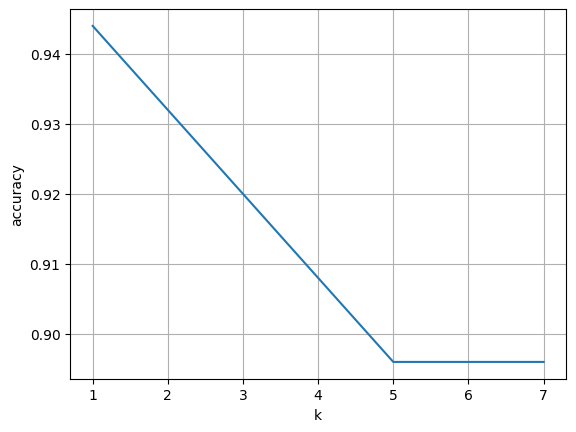

For alpha =  0.85
k=1: accuracy=0.936 
k=3: accuracy=0.896 
k=5: accuracy=0.884 
k=7: accuracy=0.868 


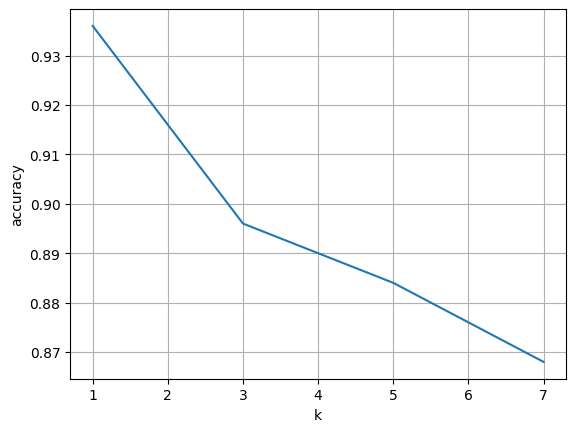

For alpha =  0.9
k=1: accuracy=0.92 
k=3: accuracy=0.884 
k=5: accuracy=0.864 
k=7: accuracy=0.856 


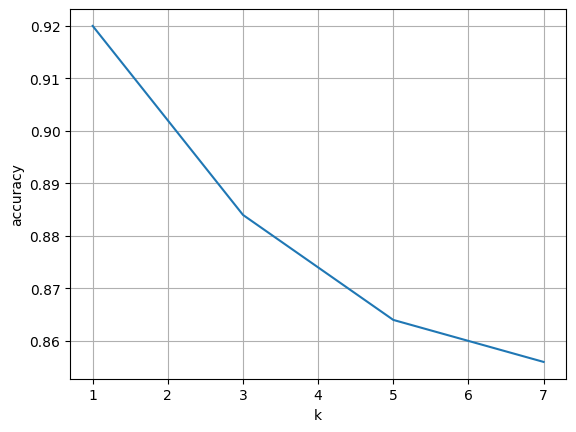

For alpha =  0.95
k=1: accuracy=0.908 
k=3: accuracy=0.876 
k=5: accuracy=0.864 
k=7: accuracy=0.856 


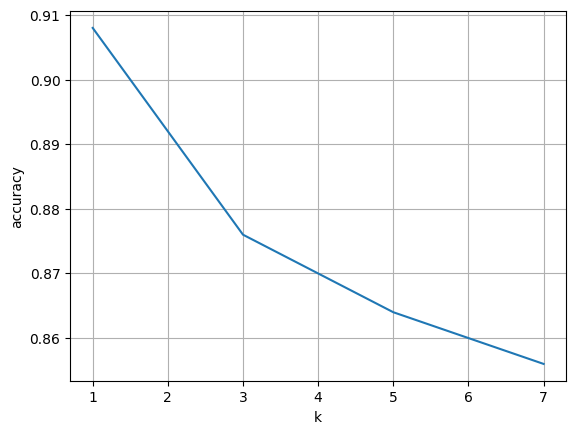

In [47]:
print("For alpha = ",alpha[0])
KNN_classifier_tuning (Dn1_train_P1, yn1_train, Dn1_test_P1, yn1_test)
print("For alpha = ",alpha[1])
KNN_classifier_tuning (Dn1_train_P2, yn1_train, Dn1_test_P2, yn1_test)
print("For alpha = ",alpha[2])
KNN_classifier_tuning (Dn1_train_P3, yn1_train, Dn1_test_P3, yn1_test)
print("For alpha = ",alpha[3])
KNN_classifier_tuning (Dn1_train_P4, yn1_train, Dn1_test_P4, yn1_test)

200

In [16]:
Dn2_train = []
Dn2_test = []
yn2_train = []
yn2_test = []

for i in range (0, len(Dn2)):

    if i % 2 != 0:
        
        Dn2_train.append(Dn2[i])
        yn2_train.append(yn2[i])

    elif i % 2 == 0:

        Dn2_test.append(Dn2[i])
        yn2_test.append(yn2[i])

Dn2_test=np.asarray(Dn2_test)
Dn2_train=np.asarray(Dn2_train)
yn2_test=np.asarray(yn2_test)
yn2_train=np.asarray(yn2_train)

In [49]:
Dn2_train_P1 = np.dot(Dn2_train,Un1)
Dn2_test_P1 = np.dot(Dn2_test,Un1)

Dn2_train_P2 = np.dot(Dn2_train,Un2)
Dn2_test_P2 = np.dot(Dn2_test,Un2)

Dn2_train_P3 = np.dot(Dn2_train,Un3)
Dn2_test_P3 = np.dot(Dn2_test,Un3)

Dn2_train_P4 = np.dot(Dn2_train,Un4)
Dn2_test_P4 = np.dot(Dn2_test,Un4)

In [50]:
print("For alpha = ",alpha[0])
KNN_simple_classifier (Dn2_train_P1, yn2_train, Dn2_test_P1, yn2_test)
print("For alpha = ",alpha[1])
KNN_simple_classifier (Dn2_train_P2, yn2_train, Dn2_test_P2, yn2_test)
print("For alpha = ",alpha[2])
KNN_simple_classifier (Dn2_train_P3, yn2_train, Dn2_test_P3, yn2_test)
print("For alpha = ",alpha[3])
KNN_simple_classifier (Dn2_train_P4, yn2_train, Dn2_test_P4, yn2_test)

For alpha =  0.8
k=1: accuracy=0.94 
For alpha =  0.85
k=1: accuracy=0.9266666666666666 
For alpha =  0.9
k=1: accuracy=0.9166666666666666 
For alpha =  0.95
k=1: accuracy=0.92 


For alpha =  0.8
k=1: accuracy=0.94 
k=3: accuracy=0.9233333333333333 
k=5: accuracy=0.9066666666666666 
k=7: accuracy=0.8933333333333333 


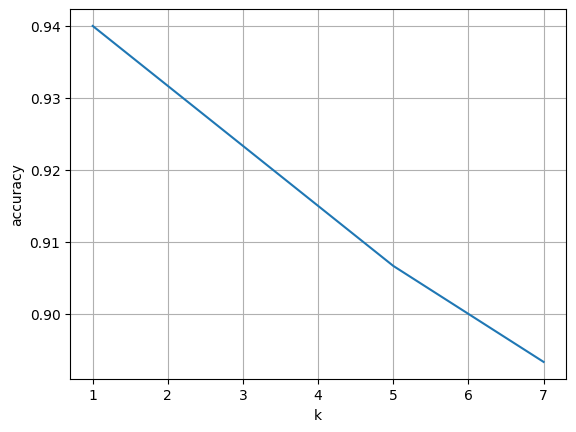

For alpha =  0.85
k=1: accuracy=0.9266666666666666 
k=3: accuracy=0.9133333333333333 
k=5: accuracy=0.89 
k=7: accuracy=0.8633333333333333 


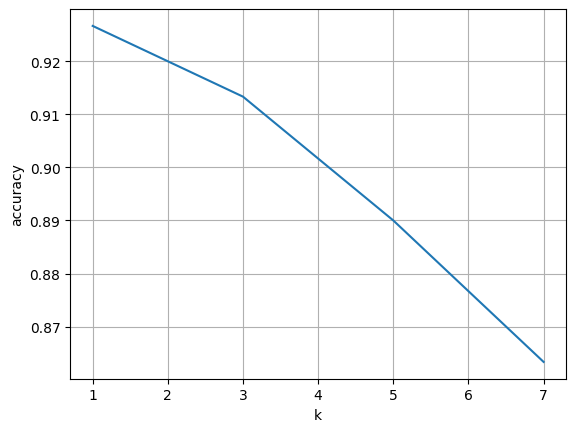

For alpha =  0.9
k=1: accuracy=0.9166666666666666 
k=3: accuracy=0.9033333333333333 
k=5: accuracy=0.8733333333333333 
k=7: accuracy=0.8533333333333334 


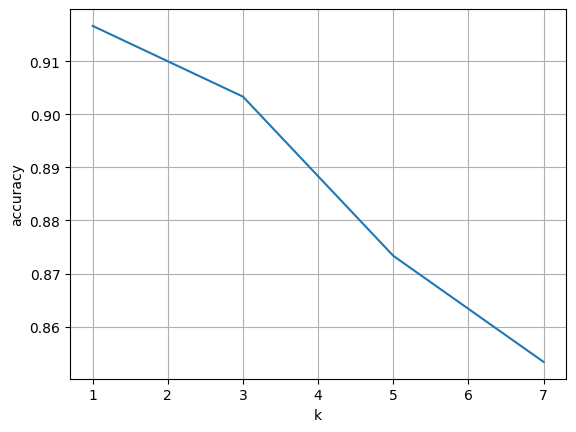

For alpha =  0.95
k=1: accuracy=0.92 
k=3: accuracy=0.9 
k=5: accuracy=0.86 
k=7: accuracy=0.85 


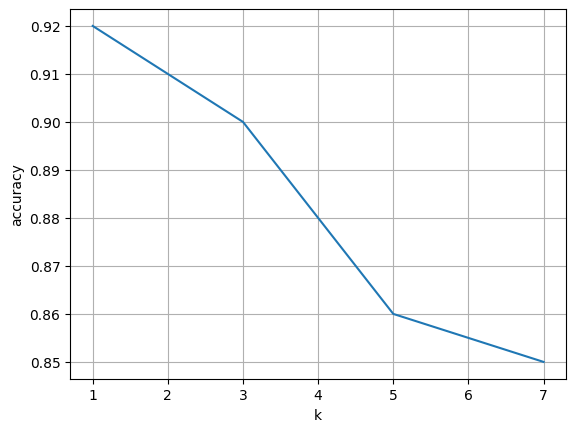

In [51]:
print("For alpha = ",alpha[0])
KNN_classifier_tuning (Dn2_train_P1, yn2_train, Dn2_test_P1, yn2_test)
print("For alpha = ",alpha[1])
KNN_classifier_tuning (Dn2_train_P2, yn2_train, Dn2_test_P2, yn2_test)
print("For alpha = ",alpha[2])
KNN_classifier_tuning (Dn2_train_P3, yn2_train, Dn2_test_P3, yn2_test)
print("For alpha = ",alpha[3])
KNN_classifier_tuning (Dn2_train_P4, yn2_train, Dn2_test_P4, yn2_test)

300

In [17]:
Dn3_train = []
Dn3_test = []
yn3_train = []
yn3_test = []

for i in range (0, len(Dn3)):

    if i % 2 != 0:
        
        Dn3_train.append(Dn3[i])
        yn3_train.append(yn3[i])

    elif i % 2 == 0:

        Dn3_test.append(Dn3[i])
        yn3_test.append(yn3[i])

Dn3_test=np.asarray(Dn3_test)
Dn3_train=np.asarray(Dn3_train)
yn3_test=np.asarray(yn3_test)
yn3_train=np.asarray(yn3_train)

In [53]:
Dn3_train_P1 = np.dot(Dn3_train,Un1)
Dn3_test_P1 = np.dot(Dn3_test,Un1)

Dn3_train_P2 = np.dot(Dn3_train,Un2)
Dn3_test_P2 = np.dot(Dn3_test,Un2)

Dn3_train_P3 = np.dot(Dn3_train,Un3)
Dn3_test_P3 = np.dot(Dn3_test,Un3)

Dn3_train_P4 = np.dot(Dn3_train,Un4)
Dn3_test_P4 = np.dot(Dn3_test,Un4)

In [54]:
print("For alpha = ",alpha[0])
KNN_simple_classifier (Dn3_train_P1, yn3_train, Dn3_test_P1, yn3_test)
print("For alpha = ",alpha[1])
KNN_simple_classifier (Dn3_train_P2, yn3_train, Dn3_test_P2, yn3_test)
print("For alpha = ",alpha[2])
KNN_simple_classifier (Dn3_train_P3, yn3_train, Dn3_test_P3, yn3_test)
print("For alpha = ",alpha[3])
KNN_simple_classifier (Dn3_train_P4, yn3_train, Dn3_test_P4, yn3_test)

For alpha =  0.8
k=1: accuracy=0.9485714285714286 
For alpha =  0.85
k=1: accuracy=0.9428571428571428 
For alpha =  0.9
k=1: accuracy=0.9342857142857143 
For alpha =  0.95
k=1: accuracy=0.9457142857142857 


For alpha =  0.8
k=1: accuracy=0.9485714285714286 
k=3: accuracy=0.9314285714285714 
k=5: accuracy=0.9257142857142857 
k=7: accuracy=0.9142857142857143 


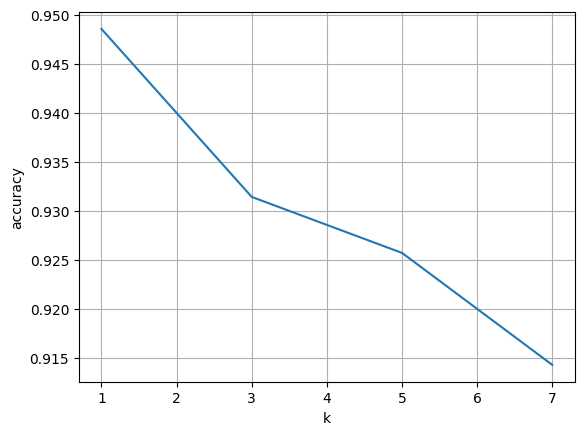

For alpha =  0.85
k=1: accuracy=0.9428571428571428 
k=3: accuracy=0.92 
k=5: accuracy=0.9228571428571428 
k=7: accuracy=0.9057142857142857 


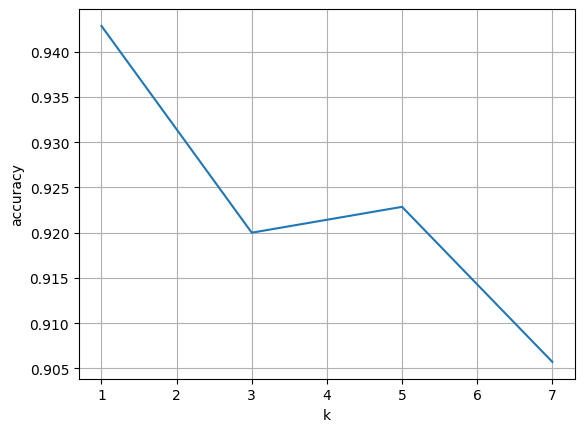

For alpha =  0.9
k=1: accuracy=0.9342857142857143 
k=3: accuracy=0.9142857142857143 
k=5: accuracy=0.9085714285714286 
k=7: accuracy=0.9028571428571428 


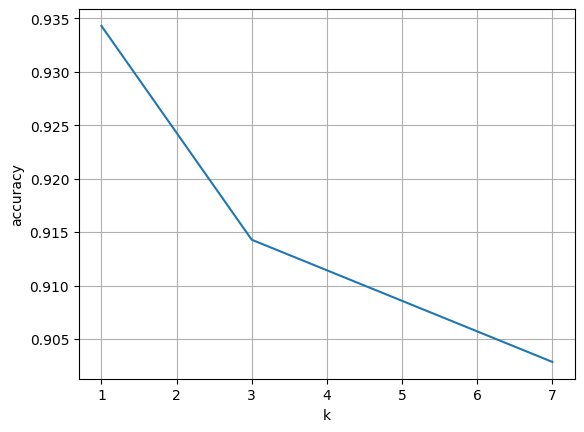

For alpha =  0.95
k=1: accuracy=0.9457142857142857 
k=3: accuracy=0.9142857142857143 
k=5: accuracy=0.9028571428571428 
k=7: accuracy=0.8971428571428571 


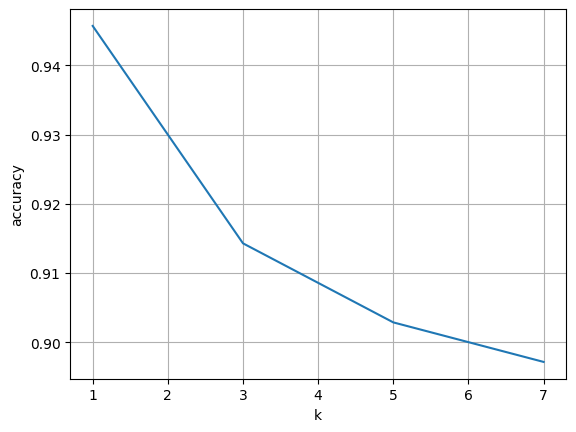

In [55]:
print("For alpha = ",alpha[0])
KNN_classifier_tuning (Dn3_train_P1, yn3_train, Dn3_test_P1, yn3_test)
print("For alpha = ",alpha[1])
KNN_classifier_tuning (Dn3_train_P2, yn3_train, Dn3_test_P2, yn3_test)
print("For alpha = ",alpha[2])
KNN_classifier_tuning (Dn3_train_P3, yn3_train, Dn3_test_P3, yn3_test)
print("For alpha = ",alpha[3])
KNN_classifier_tuning (Dn3_train_P4, yn3_train, Dn3_test_P4, yn3_test)

400

In [18]:

Dn4_train = []
Dn4_test = []
yn4_train = []
yn4_test = []

for i in range (0, len(Dn4)):

    if i % 2 != 0:
        
        Dn4_train.append(Dn4[i])
        yn4_train.append(yn4[i])

    elif i % 2 == 0:

        Dn4_test.append(Dn4[i])
        yn4_test.append(yn4[i])

Dn4_test=np.asarray(Dn4_test)
Dn4_train=np.asarray(Dn4_train)
yn4_test=np.asarray(yn4_test)
yn4_train=np.asarray(yn4_train)

In [57]:
Dn4_train_P1 = np.dot(Dn4_train,Un1)
Dn4_test_P1 = np.dot(Dn4_test,Un1)

Dn4_train_P2 = np.dot(Dn4_train,Un2)
Dn4_test_P2 = np.dot(Dn4_test,Un2)

Dn4_train_P3 = np.dot(Dn4_train,Un3)
Dn4_test_P3 = np.dot(Dn4_test,Un3)

Dn4_train_P4 = np.dot(Dn4_train,Un4)
Dn4_test_P4 = np.dot(Dn4_test,Un4)

In [58]:
print("For alpha = ",alpha[0])
KNN_simple_classifier (Dn4_train_P1, yn4_train, Dn4_test_P1, yn4_test)
print("For alpha = ",alpha[1])
KNN_simple_classifier (Dn4_train_P2, yn4_train, Dn4_test_P2, yn4_test)
print("For alpha = ",alpha[2])
KNN_simple_classifier (Dn4_train_P3, yn4_train, Dn4_test_P3, yn4_test)
print("For alpha = ",alpha[3])
KNN_simple_classifier (Dn4_train_P4, yn4_train, Dn4_test_P4, yn4_test)

For alpha =  0.8
k=1: accuracy=0.9525 
For alpha =  0.85
k=1: accuracy=0.9475 
For alpha =  0.9
k=1: accuracy=0.9425 
For alpha =  0.95
k=1: accuracy=0.9525 


For alpha =  0.8
k=1: accuracy=0.9525 
k=3: accuracy=0.9375 
k=5: accuracy=0.9325 
k=7: accuracy=0.9225 


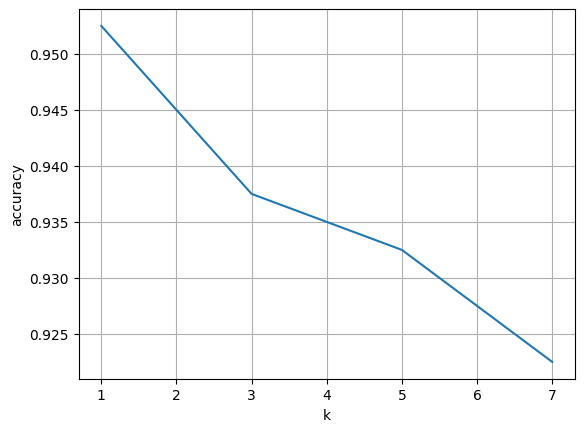

For alpha =  0.85
k=1: accuracy=0.9475 
k=3: accuracy=0.9275 
k=5: accuracy=0.9325 
k=7: accuracy=0.915 


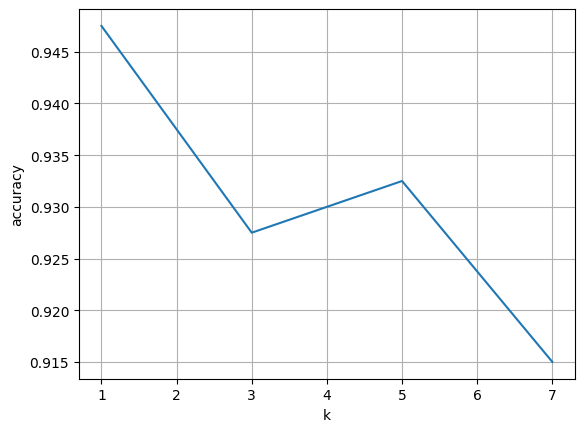

For alpha =  0.9
k=1: accuracy=0.9425 
k=3: accuracy=0.9225 
k=5: accuracy=0.9175 
k=7: accuracy=0.9125 


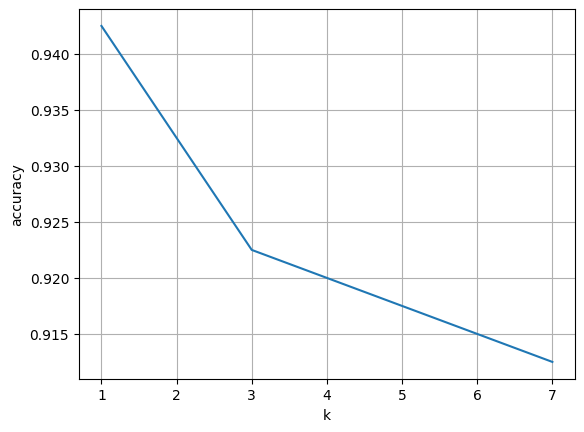

For alpha =  0.95
k=1: accuracy=0.9525 
k=3: accuracy=0.925 
k=5: accuracy=0.915 
k=7: accuracy=0.91 


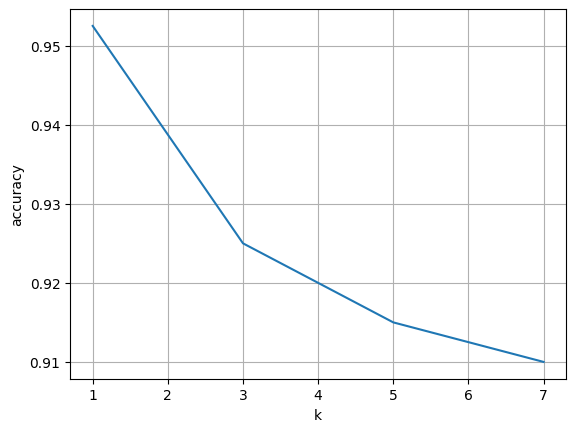

In [59]:
print("For alpha = ",alpha[0])
KNN_classifier_tuning (Dn4_train_P1, yn4_train, Dn4_test_P1, yn4_test)
print("For alpha = ",alpha[1])
KNN_classifier_tuning (Dn4_train_P2, yn4_train, Dn4_test_P2, yn4_test)
print("For alpha = ",alpha[2])
KNN_classifier_tuning (Dn4_train_P3, yn4_train, Dn4_test_P3, yn4_test)
print("For alpha = ",alpha[3])
KNN_classifier_tuning (Dn4_train_P4, yn4_train, Dn4_test_P4, yn4_test)

Success and failure cases.

Some success cases:


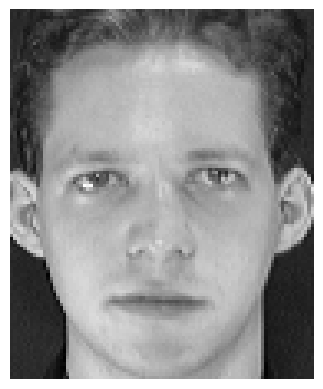

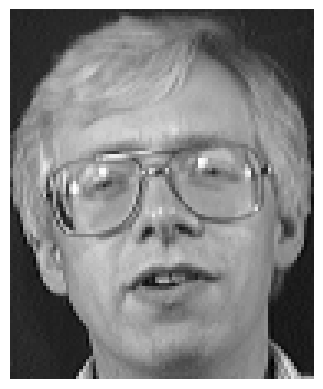

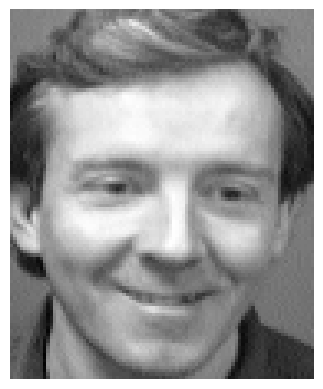

Some failure cases:


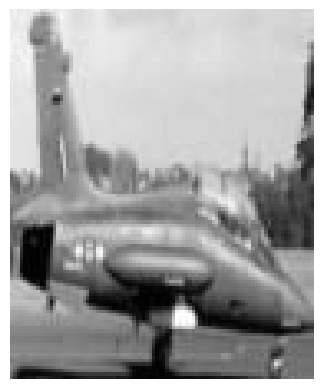

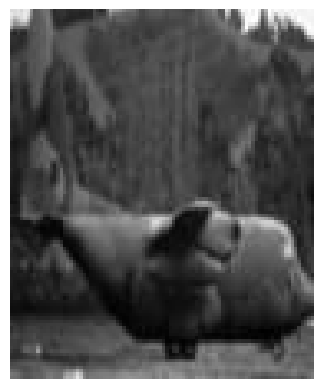

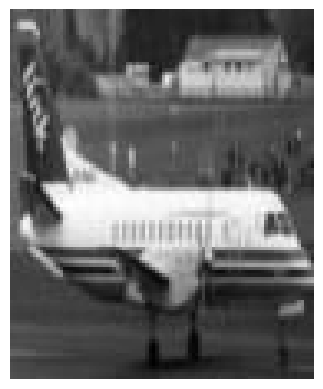

In [60]:
KNN_fail_success(Dn1_train_P1, yn1_train, Dn1_test_P1, yn1_test,Dn1_test)

LDA on non face images.

In [12]:
U = LDA(Dn,yn)

In [19]:
Dn1_train_P =np.matmul(Dn1_train,U)
Dn1_test_P =np.matmul(Dn1_test,U)
Dn2_train_P =np.matmul(Dn2_train,U)
Dn2_test_P =np.matmul(Dn2_test,U)
Dn3_train_P =np.matmul(Dn3_train,U)
Dn3_test_P =np.matmul(Dn3_test,U)
Dn4_train_P =np.matmul(Dn4_train,U)
Dn4_test_P =np.matmul(Dn4_test,U)

In [20]:
KNN_simple_classifier (Dn1_train_P, yn1_train, Dn1_test_P, yn1_test)
KNN_simple_classifier (Dn2_train_P, yn2_train, Dn2_test_P, yn2_test)
KNN_simple_classifier (Dn3_train_P, yn3_train, Dn3_test_P, yn3_test)
KNN_simple_classifier (Dn4_train_P, yn4_train, Dn4_test_P, yn4_test)

k=1: accuracy=0.944 
k=1: accuracy=0.9233333333333333 
k=1: accuracy=0.9171428571428571 
k=1: accuracy=0.9275 


k=1: accuracy=0.944 
k=3: accuracy=0.932 
k=5: accuracy=0.924 
k=7: accuracy=0.92 


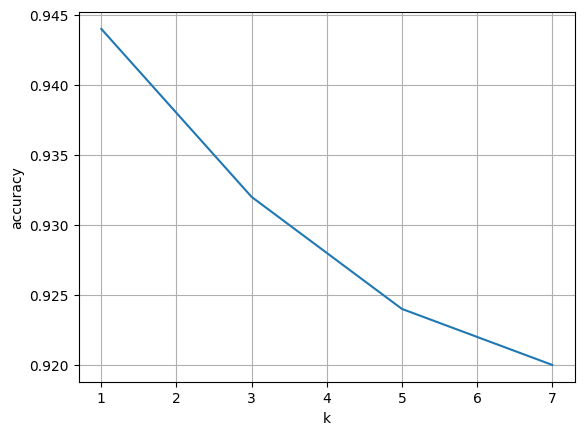

k=1: accuracy=0.9233333333333333 
k=3: accuracy=0.9166666666666666 
k=5: accuracy=0.9 
k=7: accuracy=0.9033333333333333 


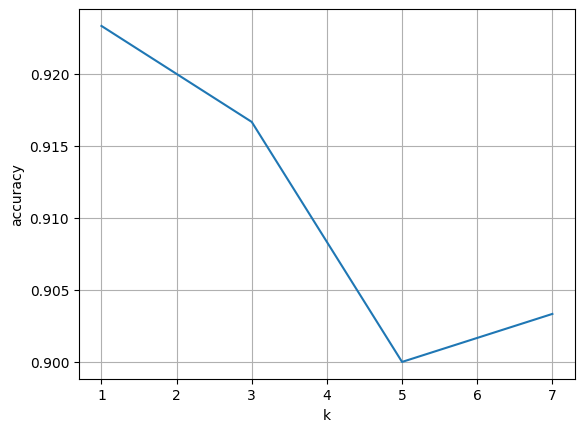

k=1: accuracy=0.9171428571428571 
k=3: accuracy=0.8971428571428571 
k=5: accuracy=0.8828571428571429 
k=7: accuracy=0.8828571428571429 


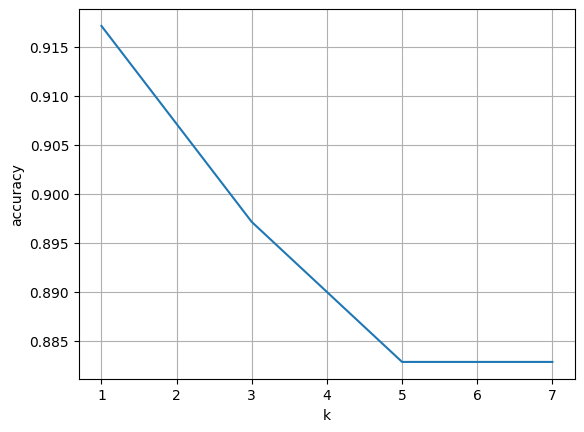

k=1: accuracy=0.9275 
k=3: accuracy=0.91 
k=5: accuracy=0.8975 
k=7: accuracy=0.895 


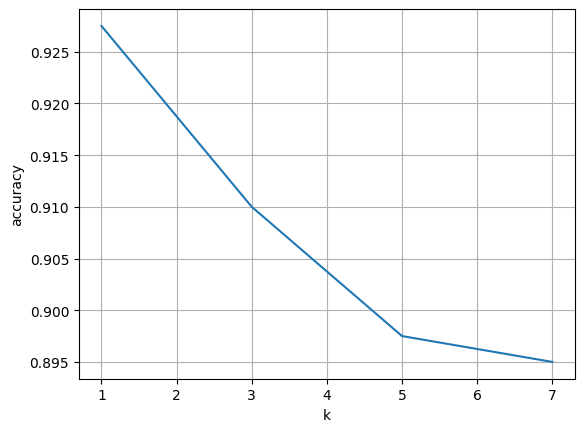

In [21]:
KNN_classifier_tuning (Dn1_train_P, yn1_train, Dn1_test_P, yn1_test)
KNN_classifier_tuning (Dn2_train_P, yn2_train, Dn2_test_P, yn2_test)
KNN_classifier_tuning (Dn3_train_P, yn3_train, Dn3_test_P, yn3_test)
KNN_classifier_tuning (Dn4_train_P, yn4_train, Dn4_test_P, yn4_test)

For k = 1


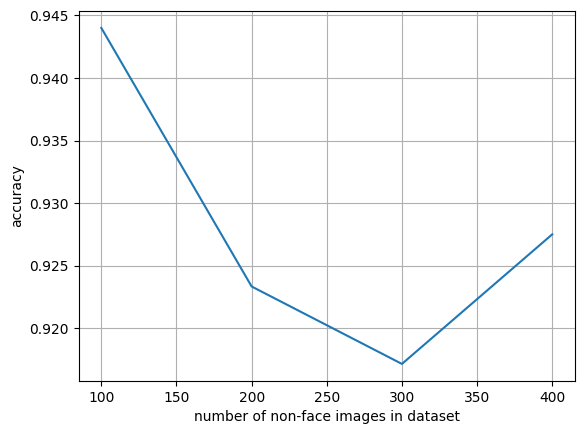

In [22]:
acn = []
nfi = [100,200,300,400]
KNN_simple_classifier_acc (Dn1_train_P, yn1_train, Dn1_test_P, yn1_test,acn)
KNN_simple_classifier_acc (Dn2_train_P, yn2_train, Dn2_test_P, yn2_test,acn)
KNN_simple_classifier_acc (Dn3_train_P, yn3_train, Dn3_test_P, yn3_test,acn)
KNN_simple_classifier_acc (Dn4_train_P, yn4_train, Dn4_test_P, yn4_test,acn)
print("For k = 1")
plt.plot(nfi,acn)
plt.xlabel("number of non-face images in dataset")
plt.ylabel("accuracy")
plt.grid()
plt.show() 

Some success cases:


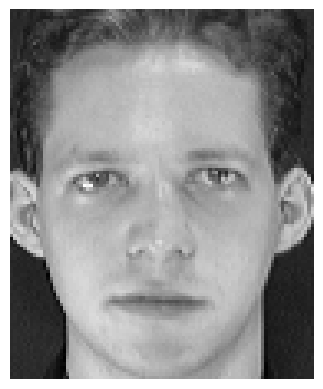

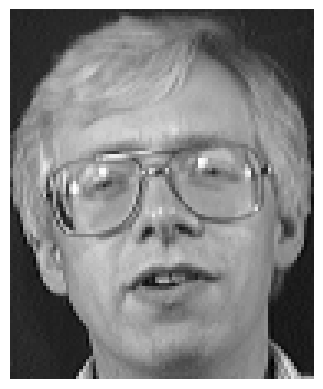

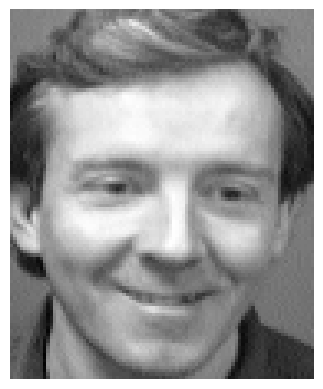

Some failure cases:


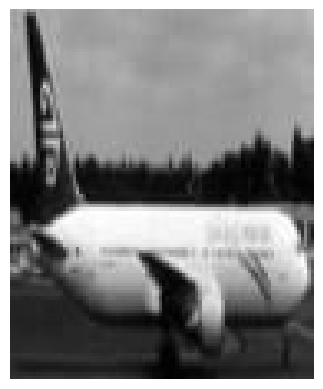

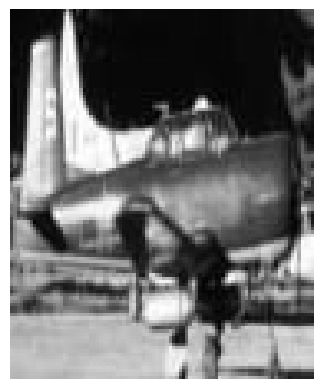

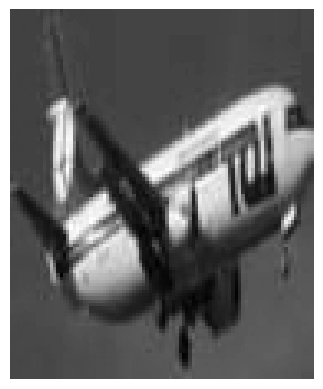

In [23]:
KNN_fail_success(Dn1_train_P, yn1_train, Dn1_test_P, yn1_test,Dn1_test)